In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [2]:
file_path = 'C:/Users/chris/Downloads/singlecell_result/final_Result'

In [3]:
####### data 불러오기 #########
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
tpm_dataframe = pd.read_csv('%s/HNSCC_all_data.csv' % file_path, index_col=0, dtype = object)

# gene 이름에 작은따옴표가 포함되어 있어서 제거하여준다.
tpm_row_name = []
for i in list(tpm_dataframe.index) :
    j = i.strip("'")
    tpm_row_name.append(j)
tpm_dataframe.index = tpm_row_name


####### 5명 sample 추출 ########
# 컬럼명의 리스트를 만들어서, 해당 컬럼명을 '_'기준으로 split한다.
# 앞 부분이 sample명 이므로, 뽑아준다. 
tpm_columns = list(tpm_dataframe.columns)
sample_name = []
for string in tpm_columns :
    string_split = string.split('_')
    sample_name.append(string_split[0])

# 해당 sample이름을 가지는 list의 index반환
HN5 = list(filter(lambda x:sample_name[x] == "HN5", range(len(sample_name))))
HNSCC5 = list(filter(lambda x:sample_name[x] == "HNSCC5", range(len(sample_name))))
HN25 = list(filter(lambda x:sample_name[x] == "HN25", range(len(sample_name))))
HNSCC25 = list(filter(lambda x:sample_name[x] == "HNSCC25", range(len(sample_name))))
HN28 = list(filter(lambda x:sample_name[x] == "HN28", range(len(sample_name))))
HNSCC28 = list(filter(lambda x:sample_name[x] == "HNSCC28", range(len(sample_name))))
HN26 = list(filter(lambda x:sample_name[x] == "HN26", range(len(sample_name))))
HNSCC26 = list(filter(lambda x:sample_name[x] == "HNSCC26", range(len(sample_name))))
HN20 = list(filter(lambda x:sample_name[x] == "HN20", range(len(sample_name))))
HNSCC20 = list(filter(lambda x:sample_name[x] == "HNSCC20", range(len(sample_name))))

reduced_sample_index = ( HN5 + HNSCC5 + HN25 + HNSCC25 + HN28 + HNSCC28 + HN26 + HNSCC26 + HN20 + HNSCC20)


####### cell별로 sample name지정 ########

# 함수 patient_meta : cell별로 sample이름에 대한 list를 만든다.
def patient_meta(cell_list, patient_name) :
    patient_list = []
    for i in range(len(cell_list)) :
        patient_list.append(patient_name)
    return patient_list

p_HN5 = patient_meta(HN5, "P5")
p_HNSCC5 = patient_meta(HNSCC5, "P5")
p_HN25 = patient_meta(HN25, "P25")
p_HNSCC25 = patient_meta(HNSCC25, "P25")
p_HN28 = patient_meta(HN28, "P28")
p_HNSCC28 = patient_meta(HNSCC28, "P28")
p_HN26 = patient_meta(HN26, "P26")
p_HNSCC26 = patient_meta(HNSCC26, "P26")
p_HN20 = patient_meta(HN20, "P20")
p_HNSCC20 = patient_meta(HNSCC20, "P20")

# list들을 합쳐 dataframe에 추가할 patient name list를 만들었다.
reduced_patient_name = (p_HN5 + p_HNSCC5 + p_HN25 + p_HNSCC25
                        + p_HN28 + p_HNSCC28 + p_HN26 + p_HNSCC26 + p_HN20 + p_HNSCC20)

# reduced dataframe을 만들어준다. 
reduced_tpm_dataframe_5sample = tpm_dataframe.iloc[:,reduced_sample_index]

# reduced dateframe 끝 행에 sample 이름 data를 추가한다.
main_df_5s = reduced_tpm_dataframe_5sample.copy()
main_df_5s.loc['sample name'] = reduced_patient_name


scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.19.2 scipy==1.5.2 pandas==1.1.3 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.1 louvain==0.7.0


In [4]:
###### p-EMT marker genes의 expression average #######

# reduced dateframe 끝 행에 p-EMT marker에 대해 expression 값을 평균낸다.
p_emt_gene = main_df_5s.loc[["TGFBI", "LAMC2", "PDPN", "ITGA5", "VIM", "MMP10", "SERPINE1", "P4HA2", "LAMA3", "CDH13", "TNC" ], :]

mean_list = []
for i in range(p_emt_gene.shape[1]) :
    total = 0
    for j in range(p_emt_gene.shape[0]) :
        total += float(p_emt_gene.iloc[j,i])
    total = total / 11
    mean_list.append(total)
    
# datafame 끝에 해당 값을 추가한다.
main_df_5s.loc['average p-EMT'] = mean_list

# sample name과 average p-EMT가 잘 들어갔나 확인했다.
main_df_5s.tail()

######### primary tumor와 LN에서 malignant cell만 뽑는다 ###############
malignant_index = []
for i in range(main_df_5s.shape[1]) :
    if ((main_df_5s.loc["classified  as cancer cell",:][i] == '1' and main_df_5s.loc["Lymph node",:][i] == '0' ) or
        (main_df_5s.loc["classified  as cancer cell",:][i] == '1' and main_df_5s.loc["Lymph node",:][i] == '1')) :
        malignant_index.append(i)
len(malignant_index)        


1408

normalizing counts per cell
    finished (0:00:00)


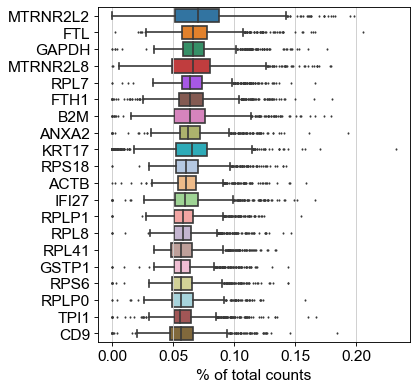

filtered out 3974 genes that are detected in less than 3 cells
... storing 'processed by Maxima enzyme' as categorical
... storing 'Lymph node' as categorical
... storing 'classified  as cancer cell' as categorical
... storing 'classified as non-cancer cells' as categorical
... storing 'non-cancer cell type' as categorical
... storing 'sample name' as categorical


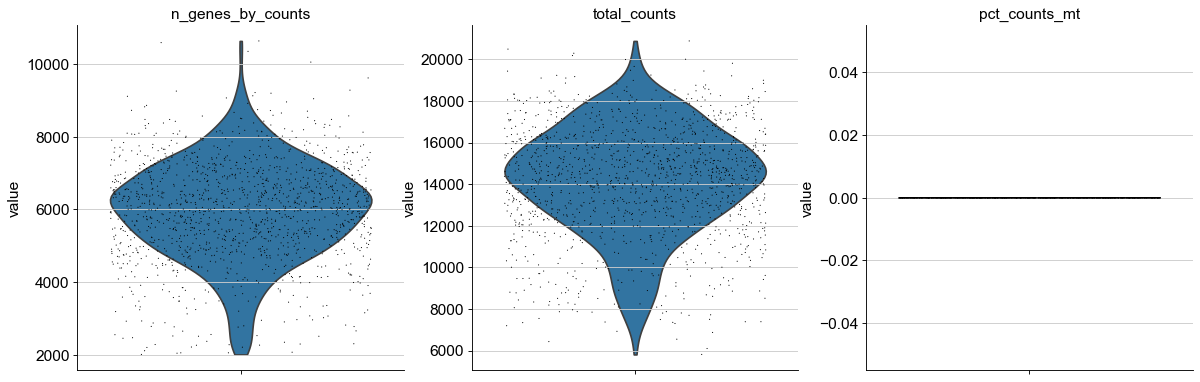

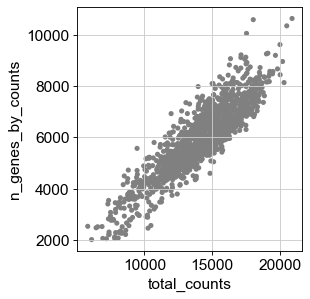

c:\users\chris\anaconda3\envs\py3.6\lib\site-packages\scanpy\preprocessing\_simple.py:375: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


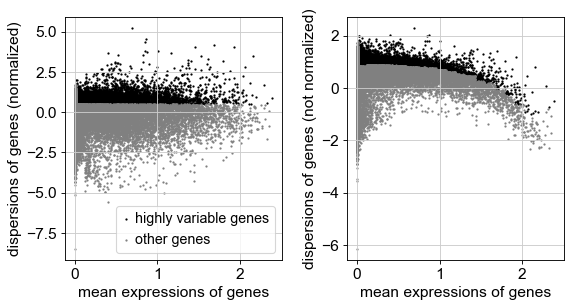

regressing out ['total_counts']
    finished (0:00:18)


In [5]:
######### 5가지 샘플의 malignant cell만 남은 것을 전처리 #########
main_df_5s_malignant = main_df_5s.iloc[:,malignant_index]
main_df_5s_malignant = main_df_5s_malignant.transpose()
metadata_dataframe = main_df_5s_malignant.iloc[:,[0,1,2,3,4,23691,23692]]

# matrix에서 metadata는 삭제하고, tpm만 남겨주었다. 
main_df_5s_malignant = main_df_5s_malignant.drop(['processed by Maxima enzyme', 'Lymph node',
       'classified  as cancer cell', 'classified as non-cancer cells',
       'non-cancer cell type', 'sample name', 'average p-EMT'], 1)
adata = sc.AnnData(X = main_df_5s_malignant, obs = metadata_dataframe)
adata.raw = adata

sc.pl.highest_expr_genes(adata, n_top=20, ) # expression 양이 높은 top gene 20 을 뽑음
sc.pp.filter_cells(adata, min_genes=200) # 200개 이하의 gene을 발현하는 cell을 삭제함
sc.pp.filter_genes(adata, min_cells=3) # 3개 이하의 cell에서 발현되는 gene을 삭제함
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
# mitochondria gene은 존재하지 않음

sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')
adata = adata[adata.obs.n_genes_by_counts < 9000, :]
adata = adata[adata.obs.n_genes_by_counts > 1000, :]


sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

adata.raw = adata # adata.raw에는 기존의 전체 유전자 다 넣음

adata = adata[:, adata.var.highly_variable]
# adata에는 higly_variable gene만 남긴다.

sc.pp.regress_out(adata, ['total_counts'])
# Regress out (mostly) unwanted sources of variation

sc.pp.scale(adata, max_value=10)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


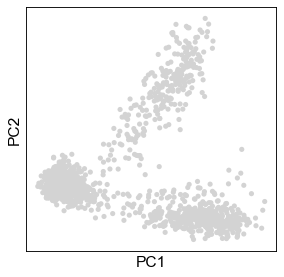

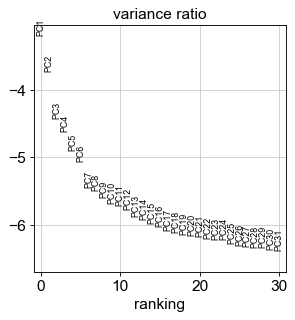

In [6]:
####### PCA ########
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata)
adata.obsm['X_pca']
sc.pl.pca_variance_ratio(adata, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


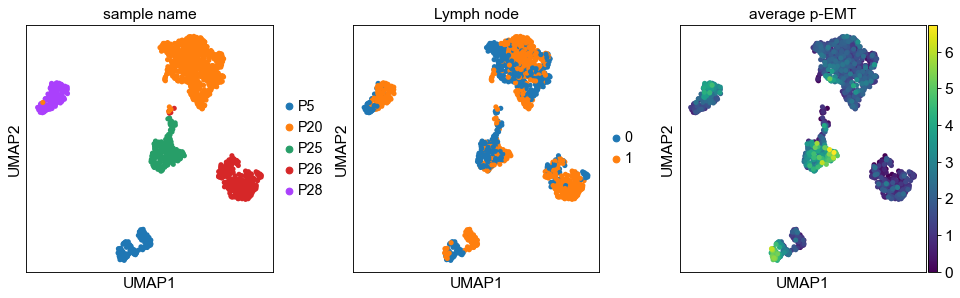

In [7]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata)

sc.pl.umap(adata, color = ['sample name', 'Lymph node','average p-EMT'])
# 첫 번째 그래프를 보면, 5개의 sample별로 나누어 진 것을 확인할 수 있고,
# 두 번째 그래프의 경우, 1은 Lymph node이고, 0은 primary tumor이다. 

In [8]:
######## primary tumor와 LN의 p-EMT 평균 발현량을 샘플별로 본다. #########
sample_list = list(adata.obs['sample name'])
df1=list(adata.obs["average p-EMT"])
df2=list(adata.obs['Lymph node'])

for i in range(0, len(df2), 1) :
    if df2[i] == '0' : df2[i] = 'primary tumor'
    elif df2[i] == '1' : df2[i] = 'lymph node'

df_col_name = ['average of p-EMT', 'Lymph node', 'sample names']
list_df = pd.DataFrame(data = list(zip(df1,df2, sample_list)), columns=df_col_name)

<AxesSubplot:xlabel='sample names', ylabel='average of p-EMT'>

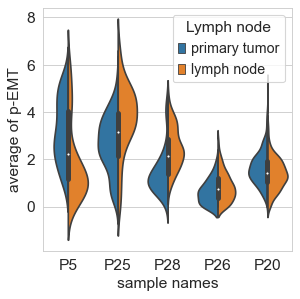

In [9]:
import seaborn as sns
from scipy import stats
sns.set_style("whitegrid")
sns.violinplot(y = list_df['average of p-EMT'], x = list_df['sample names'], hue = list_df['Lymph node'], split=True)

In [10]:
########### 각 샘플별로 t-test 를 한다.################
# 샘플별로 데이터프레임을 나눈다.
P5_df = list_df.iloc[list(np.where(list_df.loc[:,['sample names']]=='P5')[0]),:]
P20_df = list_df.iloc[list(np.where(list_df.loc[:,['sample names']]=='P20')[0]),:]
P25_df = list_df.iloc[list(np.where(list_df.loc[:,['sample names']]=='P25')[0]),:]
P26_df = list_df.iloc[list(np.where(list_df.loc[:,['sample names']]=='P26')[0]),:]
P28_df = list_df.iloc[list(np.where(list_df.loc[:,['sample names']]=='P28')[0]),:]

In [11]:
# sample 5 번 t-test
tt1 = P5_df.iloc[list(np.where(P5_df.loc[:,['Lymph node']]=='lymph node')[0]),:]['average of p-EMT']
tt2 = P5_df.iloc[list(np.where(P5_df.loc[:,['Lymph node']]=='primary tumor')[0]),:]['average of p-EMT']
levene = stats.levene(tt1,tt2)
levene

LeveneResult(statistic=0.04133145830390027, pvalue=0.8392300400762478)

In [12]:
# sample 20 번 t-test
tt1 = P20_df.iloc[list(np.where(P20_df.loc[:,['Lymph node']]=='lymph node')[0]),:]['average of p-EMT']
tt2 = P20_df.iloc[list(np.where(P20_df.loc[:,['Lymph node']]=='primary tumor')[0]),:]['average of p-EMT']
levene = stats.levene(tt1,tt2)
levene

LeveneResult(statistic=2.0602374486026367, pvalue=0.15166177239063297)

In [13]:
# sample 25 번 t-test
tt1 = P25_df.iloc[list(np.where(P25_df.loc[:,['Lymph node']]=='lymph node')[0]),:]['average of p-EMT']
tt2 = P25_df.iloc[list(np.where(P25_df.loc[:,['Lymph node']]=='primary tumor')[0]),:]['average of p-EMT']
levene = stats.levene(tt1,tt2)
levene

LeveneResult(statistic=1.3569518260517006, pvalue=0.24542018497475784)

In [14]:
# sample 26 번 t-test
tt1 = P26_df.iloc[list(np.where(P26_df.loc[:,['Lymph node']]=='lymph node')[0]),:]['average of p-EMT']
tt2 = P26_df.iloc[list(np.where(P26_df.loc[:,['Lymph node']]=='primary tumor')[0]),:]['average of p-EMT']
levene = stats.levene(tt1,tt2)
levene

LeveneResult(statistic=3.080130950413422, pvalue=0.08041408754503233)

In [15]:
# sample 28 번 t-test
tt1 = P28_df.iloc[list(np.where(P28_df.loc[:,['Lymph node']]=='lymph node')[0]),:]['average of p-EMT']
tt2 = P28_df.iloc[list(np.where(P28_df.loc[:,['Lymph node']]=='primary tumor')[0]),:]['average of p-EMT']
levene = stats.levene(tt1,tt2)
levene

LeveneResult(statistic=0.4463172174993475, pvalue=0.5052467575859589)